# K-Means Clustering

In this notebook, we'll dive deeper into **K-Means**, one of the most widely used clustering algorithms. We'll explore how it works, how to choose the number of clusters (`k`), and how to evaluate the clustering quality.

We'll use the **Silhouette Score** as our primary evaluation metric, along with **visual inspection**.


## How K-Means Clustering Works

K-Means is a centroid-based clustering algorithm that partitions the dataset into \(k\) clusters.

### Steps:
1. **Initialisation**: Randomly place \(k\) centroids in the feature space.
2. **Assignment**: Each data point is assigned to the nearest centroid, forming clusters.
3. **Update**: New centroids are computed as the mean of all points in each cluster.
4. **Repeat**: Assignment and update steps repeat until centroids stabilise or a maximum number of iterations is reached.

The algorithm aims to **minimise the total within-cluster sum of squares** (inertia), i.e., the variance within each cluster.

K-Means works well for convex, isotropic clusters but struggles with non-spherical or unevenly sized groups.

## K-Means: Hyperparameters and Initialisation Strategies

### Key Hyperparameters

Apart from the number of clusters $k$, the main hyperparameters in K-Means include:

- `init`: How the initial centroids are selected.  
  - Common values: `"random"` or `"k-means++"`  
- `n_init`: Number of times the algorithm is run with different centroid seeds. The best result (lowest inertia) is chosen.  
  - Default is 10 in Scikit-Learn.
- `max_iter`: Maximum number of iterations allowed for a single run.
- `random_state`: Controls randomness in centroid initialisation for reproducibility.

---

### 📉 Inertia in K-Means

**Inertia** measures the total squared distance of each data point to its assigned cluster centroid. It represents how compact the clusters are.

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

- $k$: number of clusters  
- $C_i$: cluster $i$  
- $\mu_i$: centroid of cluster $i$  
- $x$: data point in $C_i$  
- $\| x - \mu_i \|^2$: squared Euclidean distance

Lower inertia means tighter, more coherent clusters.


### Choosing the Number of Clusters ($k$)

K-Means requires $k$ to be specified in advance. There are two common methods to choose it:

- **Elbow Method**:  
  Plot the total within-cluster sum of squares (WCSS or inertia) against different $k$ values. Look for an "elbow" in the plot — a point where adding more clusters doesn’t significantly reduce the inertia.


- **Silhouette Score**:  
  Evaluate how well-separated and compact the clusters are. The $k$ that gives the highest average silhouette score is often a good choice.

---

### k-means++ Initialisation

Initialising centroids randomly can lead to poor convergence or suboptimal clustering. **k-means++** is a smarter initialisation strategy that improves both **speed** and **accuracy**.

#### How it works:
1. Randomly choose the first centroid from the data points.
2. For each remaining data point $x$, compute its **distance** $D(x)$ to the nearest already chosen centroid.
3. Select the next centroid from the remaining points **with probability proportional to $D(x)^2$**.
4. Repeat until $k$ centroids are selected.

This spreads the initial centroids out in the data space and often results in better clustering.

**In Scikit-Learn**, this is enabled by default using `init="k-means++"`.

---

In practice, using `init="k-means++"` with multiple `n_init` runs and evaluating with the silhouette score or elbow method gives reliable and stable results.


## Demonstration: K-Means on Synthetic Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

sns.set(style="whitegrid", palette="muted", font_scale=1.2)


## Choosing the Number of Clusters

We'll run K-Means for different values of $k$ and compute the **average silhouette score** to decide the best number of clusters.


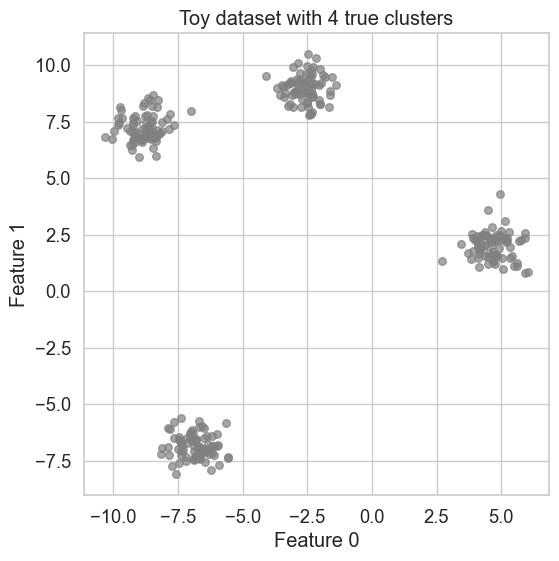

In [2]:

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], s=30, color='grey', alpha=0.7)
plt.title("Toy dataset with 4 true clusters")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


,k,Silhouette
0,2,0.615485
1,3,0.799280
2,4,0.875647
3,5,0.731072
4,6,0.585323


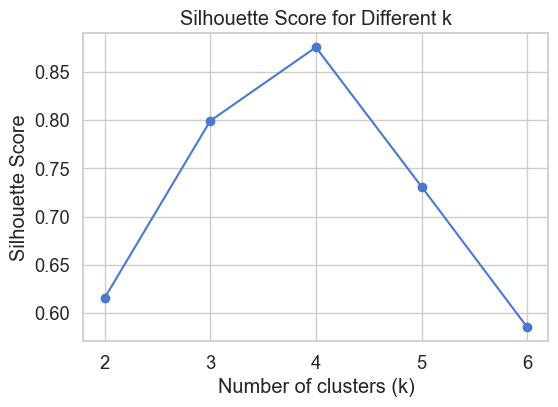

In [3]:
results = []
ks = [2, 3, 4, 5, 6]
for k in ks:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil = silhouette_score(X, labels)
    results.append((k, sil))

df = pd.DataFrame(results, columns=["k", "Silhouette"])
display(df)

# Plot silhouette score vs k
plt.figure(figsize=(6,4))
plt.plot(df.k, df.Silhouette, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.grid(True)
plt.show()


## Final Clustering with Best k

From the silhouette scores, we choose the best $k$ (typically where the score peaks).
Let's fit K-Means again and visualise the clusters.


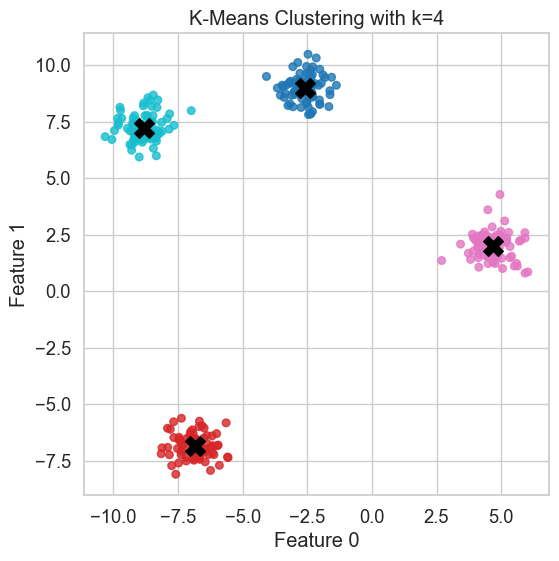

In [4]:
best_k = 4
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(X)
centroids = km.cluster_centers_

plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=30, alpha=0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X')
plt.title(f"K-Means Clustering with k={best_k}")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()


## Application: Clustering on the Wine Dataset

In this section, we’ll apply **K-Means clustering** to the **Wine dataset**, a real-world dataset included in Scikit-Learn.

The dataset contains **chemical properties of wines** derived from three different cultivars (grape varieties). Each sample includes 13 numerical features such as:
- Alcohol
- Malic acid
- Ash
- Flavanoids
- Color intensity

Although the dataset has labels (the cultivar), we’ll treat this as an **unsupervised problem** and see how well K-Means can discover the natural groupings.

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X_raw = wine.data
y_true = wine.target
feature_names = wine.feature_names

# Standardise features
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

df_wine = pd.DataFrame(X_raw, columns=feature_names)
df_wine['Target (Cultivar)'] = y_true

# Display first few rows
df_wine.head()



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target (Cultivar)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Hyperparameter: Number of Clusters (k)

The `k` parameter specifies the number of clusters that K-Means will try to find.

Since the wine dataset has 3 known cultivars, we'll test a range of $k$ values around that to see which yields the best **silhouette score**, which reflects how well-separated and compact the clusters are.


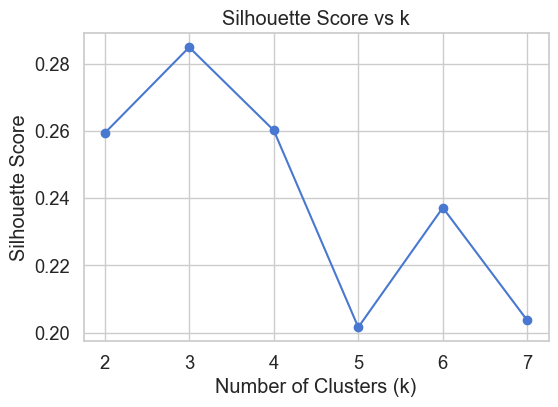

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores_k = []
ks = range(2, 8)

for k in ks:
    km = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_k.append((k, score))

df_k = pd.DataFrame(silhouette_scores_k, columns=["k", "Silhouette Score"])
df_k

plt.figure(figsize=(6,4))
plt.plot(df_k["k"], df_k["Silhouette Score"], marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.grid(True)
plt.show()



### Hyperparameter: Centroid Initialisation (`init`)

The `init` parameter controls how the initial centroids are selected:

- `"random"`: choose k random points from the data
- `"k-means++"`: spread out initial centroids for better results (default)

Poor initialisation can lead to suboptimal clustering. Let’s compare the silhouette scores for both.


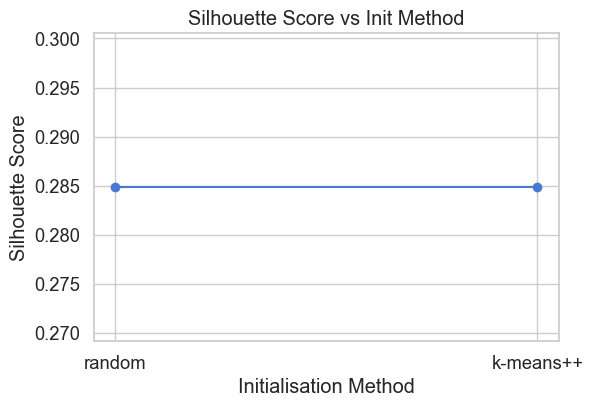

In [7]:
init_methods = ["random", "k-means++"]
silhouette_scores_init = []

for method in init_methods:
    km = KMeans(n_clusters=3, init=method, n_init=10, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_init.append((method, score))

df_init = pd.DataFrame(silhouette_scores_init, columns=["Init Method", "Silhouette Score"])
df_init

plt.figure(figsize=(6,4))
plt.plot(df_init["Init Method"], df_init["Silhouette Score"], marker='o', linestyle='-')
plt.xlabel("Initialisation Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Init Method")
plt.grid(True)
plt.show()


### Hyperparameter: Number of Initialisations (`n_init`)

K-Means is run multiple times with different random initialisations. The `n_init` parameter determines how many times this happens.

Higher `n_init` increases robustness, but also computation time. We'll test a few values to see if performance improves.


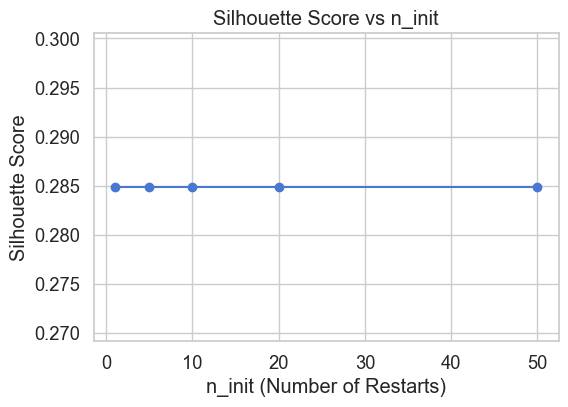

In [8]:
n_init_vals = [1, 5, 10, 20, 50]
silhouette_scores_ninit = []

for n in n_init_vals:
    km = KMeans(n_clusters=3, init="k-means++", n_init=n, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores_ninit.append((n, score))

df_ninit = pd.DataFrame(silhouette_scores_ninit, columns=["n_init", "Silhouette Score"])
df_ninit

plt.figure(figsize=(6,4))
plt.plot(df_ninit["n_init"], df_ninit["Silhouette Score"], marker='o', linestyle='-')
plt.xlabel("n_init (Number of Restarts)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs n_init")
plt.grid(True)
plt.show()


### Final K-Means Clustering with Selected Hyperparameters

Based on our tests:
- `k = 3` yields the best clustering
- `init = "k-means++"` provides better centroid spread
- `n_init = 10` is sufficient for stable results

Let’s run K-Means one last time with these settings.


In [9]:
best_k = 3
km_final = KMeans(n_clusters=best_k, init="k-means++", n_init=10, random_state=42)
final_labels = km_final.fit_predict(X)

# Optional: inspect how many points are in each cluster
pd.Series(final_labels).value_counts().sort_index()

from sklearn.metrics import silhouette_score
import seaborn as sns

# Compute silhouette score
final_sil_score = silhouette_score(X, final_labels)
print(f"Silhouette Score (final model): {final_sil_score:.4f}")

# Create a DataFrame for comparison
df_compare = pd.DataFrame({
    "True Label": y_true,
    "Cluster": final_labels
})

# Crosstab to see composition of each cluster by true label
cluster_summary = pd.crosstab(df_compare["Cluster"], df_compare["True Label"],
                              rownames=["Cluster"], colnames=["True Cultivar"])
cluster_summary



Silhouette Score (final model): 0.2849


True Cultivar,0,1,2
Cluster,,,
0,0,65,0
1,0,3,48
2,59,3,0
